# Linear Regression code along

dataset from ISLR - Introduction to Statistical Learning with r

- TV, Radio, Newspaper spending in thousand$
- Sales in thousand units

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# EDA - Exploratory data analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [4]:
df.shape #200 samples, 3 features, 1 label

(200, 4)

In [5]:
df.columns[:-1]

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [6]:
number_fetures = df.shape[1]-1
number_fetures

3

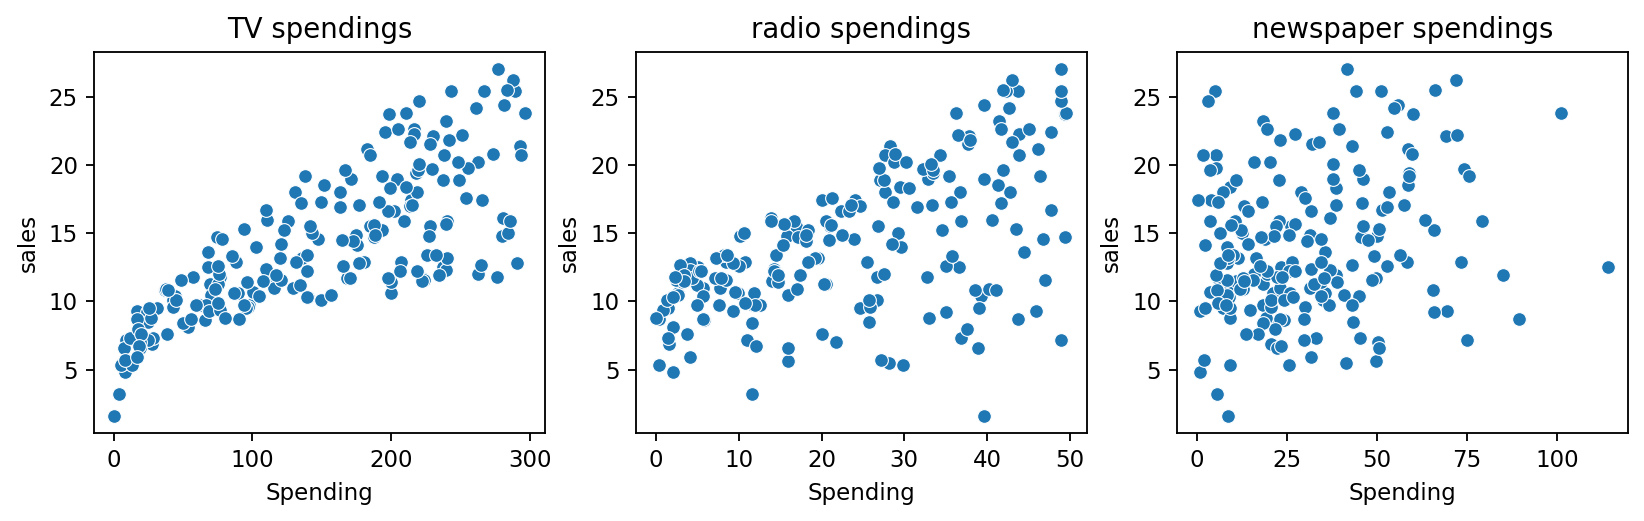

In [7]:
fig,ax = plt.subplots(1,number_fetures, figsize=(12,3), dpi=165)


for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x= feature, y= "sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")


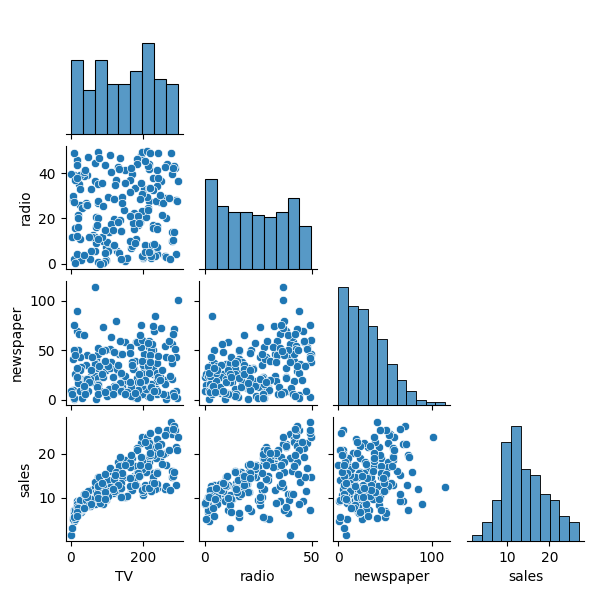

In [8]:
ax = sns.pairplot(df, height=1.5, corner=True)

# Simple Linear regression

$$y \approx \beta_0 +\beta_1x $$

Intercept: 7.033
Slope: 0.048


[Text(0.5, 1.0, 'Regression line on TV advertisement')]

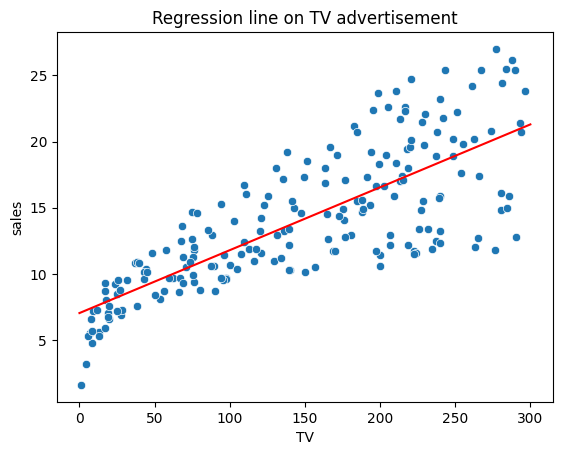

In [9]:
X, y = df["TV"], df["sales"]
beta_1, beta_0 = np.polyfit(X, y, deg = 1)
print(f"Intercept: {beta_0:.3f}")
print(f"Slope: {beta_1:.3f}")

def y_hat(x): return beta_0 + beta_1*x

spend = np.linspace(0,300)

ax = sns.scatterplot(data = df, x = "TV", y = "sales")
sns.lineplot(x = spend, y = y_hat(spend), color="red")
ax.set(title="Regression line on TV advertisement")

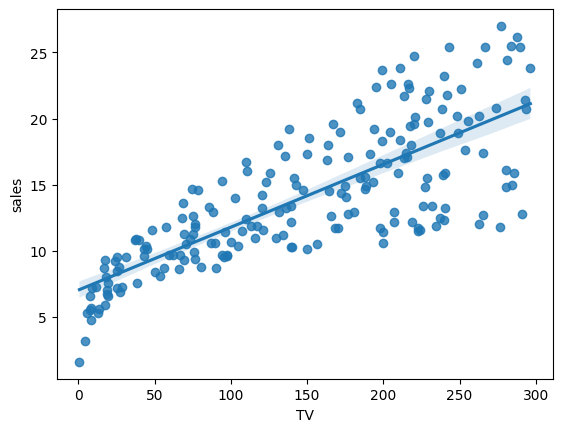

In [10]:
ax = sns.regplot(x=X, y=y)

## Multiple Linear regression

In [11]:
X, y = df.drop("sales", axis="columns"), df["sales"]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [13]:
X.insert(0, "Intercept", 1)

In [14]:
X.head()

,Intercept,TV,radio,newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


In [15]:
# @ operator - matmul operator
# in numpy - the matmul operator is operator overloaded to handle matrix multiplication
X.T@X

,Intercept,TV,radio,newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
radio,4652.8,698061.98,152107.86,164946.55
newspaper,6110.8,919625.28,164946.55,281096.74


In [16]:
# normal equation - OLS
beta_hat = np.linalg.inv(X.T@X) @ X.T @ y
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [17]:
regression_fit = lambda X,y: np.linalg.inv(X.T@X) @ X.T @ y
beta_hat = regression_fit(X,y)

beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [18]:
predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230, 38, 69]
y_hat = predict(test_sample, beta_hat)

In [19]:
print(f"With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales of {y_hat:.1f}k units")

With $230k on TV, $38k on radio and $69k on newspaper we get a predicted sales of 20.6k units


## Train|Test split

In [20]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction,random_state=42, replace=False)
train.head()

,TV,radio,newspaper,sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [21]:
test = df.drop(train.index)
train.shape, test.shape

((140, 4), (60, 4))

In [22]:
X_train, y_train = train.drop("sales", axis="columns"), train["sales"]
X_test, y_test = test.drop("sales", axis="columns"), test["sales"]
X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

## Prediction

In [23]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters:\n{beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5]

Beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [24]:
X_test.iloc[1]
# spending $120.2k on TV, $19.6k on radio and $11.6k on newspaper gives prediction on 12.19k units

Intercept      1.0
TV           120.2
radio         19.6
newspaper     11.6
Name: 8, dtype: float64

## Evaluate model performance

In [25]:
m = len(y_test)

# removed extra dimension (60,1) -> (60,)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))

mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)

root_mean_squared_error = np.sqrt(mean_squared_error)


mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)